In [1]:
import numpy as np
import os
import pandas as pd
import math

from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u

from eventio.simtel.simtelfile import SimTelFile
import matplotlib.pyplot as plt

#%matplotlib
#%matplotlib inline 

In [65]:
#path = '/home/andrii/work/sem_telarray/dist_500_radius_120_factor_1000000/'
path = '/home/andrii/work/sem_telarray/r30/'
files = ['ff-SST1M.simtel_r30cm_200pe.gz', 'ff-SST1M.simtel_r30cm_shift30_200pe.gz', 'ff-SST1M.simtel_r30cm_shift120_200pe.gz', 'ff-SST1M.simtel_r150cm_shift120_20pe_dist_500.gz', 'ff-SST1M.simtel_r150cm_shift120_500pe_dist_100.gz', 'ff-SST1M.simtel_r150cm_shift120_2000pe_dist_10.gz']

#files = ['ff-SST1M.simtel_1pe.gz', 'ff-SST1M.simtel_2pe.gz', 'ff-SST1M.simtel_5pe.gz', 'ff-SST1M.simtel_10pe.gz', 'ff-SST1M.simtel_100pe.gz', 'ff-SST1M.simtel_200pe.gz', 'ff-SST1M.simtel_500.gz']

pe_expetcted = [1, 2, 5, 10, 100, 200, 500]

output_dir = '/home/andrii/work/sem_telarray/charge_resolution/'

In [66]:
try:
    os.makedirs(output_dir, exist_ok=True)
    print("Directory ", output_dir, " Created ")
except FileExistsError:
    print("Directory ", output_dir, " already exists")

Directory  /home/andrii/work/sem_telarray/charge_resolution/  Created 


In [17]:
def plot_event(n_events, file, out_name):
    
    source = EventSource(file, max_events=n_events, back_seekable=True)
    seeker = EventSeeker(source)
    
    for event in source:
        print(event.index)
        camgeom = source.subarray.tel[1].camera.geometry

        fig, (ax0, ax1) = plt.subplots(1, 2)
        disp0 = CameraDisplay(ax=ax0, geometry=camgeom)
        disp1 = CameraDisplay(ax=ax1, geometry=camgeom)

 
        title = "Sum of samples\n in waveforms : event {} ".format( int(event.index.event_id/100) )
        disp = CameraDisplay(ax=ax0, geometry=camgeom, title=title)
        disp.image = event.r0.tel[1].waveform[0].sum(axis=1)
        
        title = "True Image : event {} ".format( int(event.index.event_id/100 ))
        disp = CameraDisplay(ax=ax1, geometry=camgeom, title=title)
        disp.image = event.simulation.tel[1].true_image

        disp.cmap = plt.cm.viridis
        disp.add_colorbar()
        disp.set_limits_percent(95)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'diplay_r150_pe200_{}.png'.format(out_name)), dpi=800)

In [43]:
def get_average_pe(file):
    
    source = EventSource(file, back_seekable=True)
    seeker = EventSeeker(source)
    
    mean_pe = []
    
    for event in source:
        
        #print(np.mean(event.simulation.tel[1].true_image))
        mean_pe.append(np.mean(event.simulation.tel[1].true_image))
        
    return mean_pe

{'event_id': 100, 'obs_id': 7}
{'event_id': 100, 'obs_id': 7}
{'event_id': 100, 'obs_id': 7}
{'event_id': 100, 'obs_id': 7}
{'event_id': 100, 'obs_id': 7}
{'event_id': 100, 'obs_id': 7}


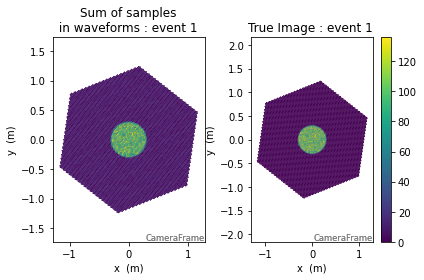

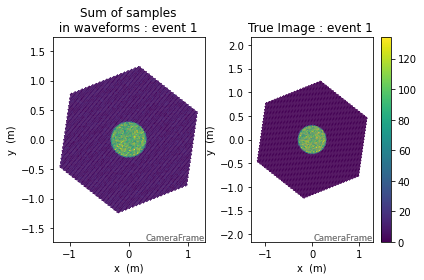

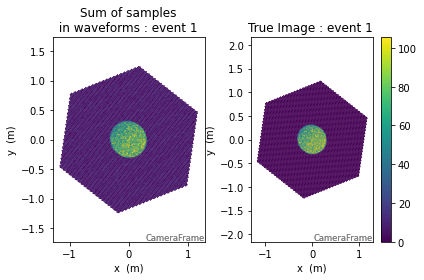

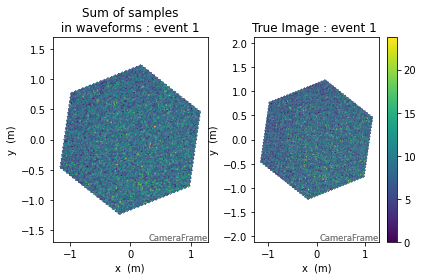

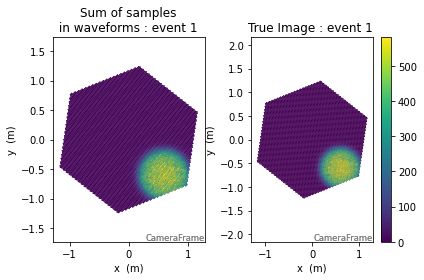

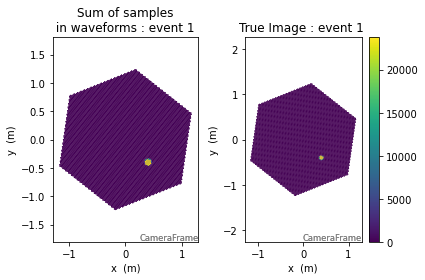

In [67]:
for item, i_file in enumerate(files):
    plot_event(1, path+files[item], files[item][16:-3])

In [16]:
files[0][16:-3]

'0pe'

In [51]:
result = []

for item, i_file in enumerate(files):
    
    result.append(np.mean(get_average_pe(path+i_file)))

In [52]:
result

[0.5139476649555528,
 1.017891573807437,
 2.541792913484412,
 5.088969575560285,
 50.88267184174283,
 101.80865155878301,
 254.403142606736]

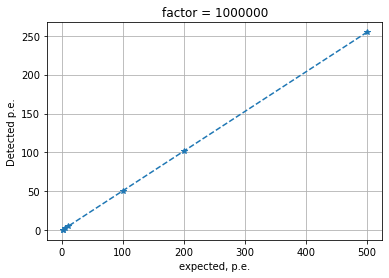

In [64]:
pe_expetcted

plt.plot(pe_expetcted, result, '*--')
plt.title('factor = 1000000')
plt.xlabel('expected, p.e.')
plt.ylabel('Detected p.e.')
plt.grid(True)
plt.savefig('diplay_factor_1000000.png', dpi=800)
plt.show()